<a href="https://colab.research.google.com/github/Soumita072/Credit-Card-Fraud-Detection-System/blob/main/credit_card_fraud_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q --upgrade pip


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 25.1 MB/s eta 0:00:00


In [2]:
!pip install -q pandas numpy matplotlib seaborn scikit-learn imbalanced-learn xgboost kaggle


In [3]:
# Colab cell 2A: upload interactively (browser file picker)
from google.colab import files
uploaded = files.upload()   # choose creditcard.csv from your computer
import io, pandas as pd
data = pd.read_csv(io.BytesIO(list(uploaded.values())[0]))
data.head()


Saving creditcard.csv to creditcard (1).csv


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Missing values per column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


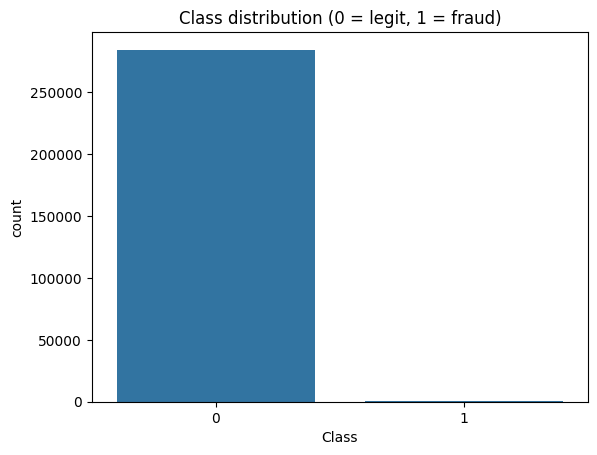

In [4]:
# Colab cell 3: quick EDA
import matplotlib.pyplot as plt, seaborn as sns
print("Shape:", data.shape)
display(data.head())
print("\nMissing values per column:\n", data.isnull().sum())
print("\nClass distribution:\n", data['Class'].value_counts())

# Visualize class imbalance
sns.countplot(x='Class', data=data)
plt.title("Class distribution (0 = legit, 1 = fraud)")
plt.show()



In [5]:
# Colab cell 4: preprocessing
import numpy as np
from sklearn.preprocessing import StandardScaler
SEED = 42

X = data.drop('Class', axis=1)
y = data['Class']

# Scale 'Amount' and 'Time'
scaler = StandardScaler()
X[['Time','Amount']] = scaler.fit_transform(X[['Time','Amount']])

# Check shapes
print("X shape:", X.shape, "y shape:", y.shape)


X shape: (284807, 30) y shape: (284807,)


In [6]:
# Colab cell 5: split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=SEED, stratify=y)

print("Train:", X_train.shape, y_train.value_counts().to_dict())
print("Test:", X_test.shape, y_test.value_counts().to_dict())


Train: (199364, 30) {0: 199020, 1: 344}
Test: (85443, 30) {0: 85295, 1: 148}


In [7]:
# Colab cell 6: apply SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=SEED)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("After SMOTE:", y_train_res.value_counts().to_dict())


After SMOTE: {0: 199020, 1: 199020}


In [8]:
# Colab cell 7: training
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=SEED, n_jobs=-1)
rf.fit(X_train_res, y_train_res)

# XGBoost (fast and often strong)
xgb_clf = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=SEED)
xgb_clf.fit(X_train_res, y_train_res)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [19:11:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [10]:
# Colab cell 8: evaluation helpers
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall (Sensitivity):", recall_score(y_test, y_pred))
    print("F1:", f1_score(y_test, y_pred))
    if y_proba is not None:
        print("ROC AUC:", roc_auc_score(y_test, y_proba))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("---- Random Forest ----")
evaluate_model(rf, X_test, y_test)

print("\n---- XGBoost ----")
evaluate_model(xgb_clf, X_test, y_test)


---- Random Forest ----
Accuracy: 0.9994265182636377
Precision: 0.8666666666666667
Recall (Sensitivity): 0.7905405405405406
F1: 0.8268551236749117
ROC AUC: 0.9544413030769207

Confusion Matrix:
 [[85277    18]
 [   31   117]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.87      0.79      0.83       148

    accuracy                           1.00     85443
   macro avg       0.93      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443


---- XGBoost ----
Accuracy: 0.9992158515033414
Precision: 0.7579617834394905
Recall (Sensitivity): 0.8040540540540541
F1: 0.780327868852459
ROC AUC: 0.9708236755425923

Confusion Matrix:
 [[85257    38]
 [   29   119]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.76      0.80      0.78       148

    accuracy 

Random Forest curves


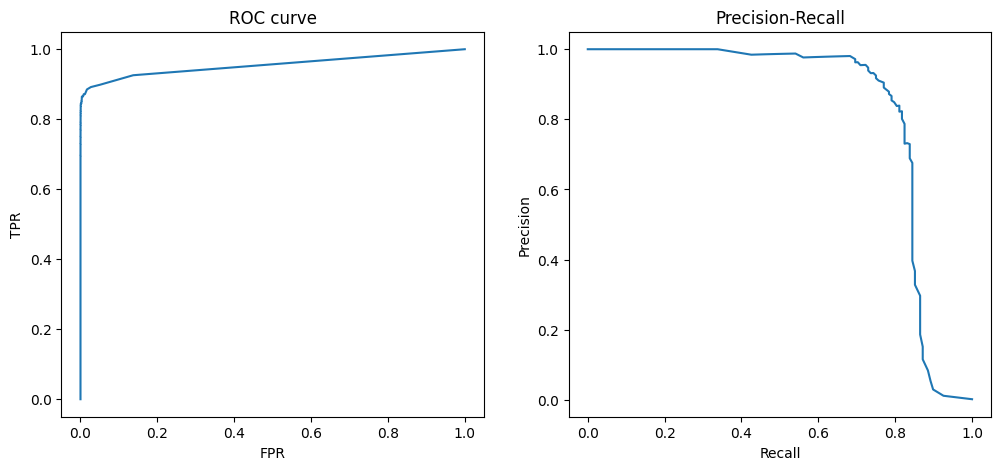

XGBoost curves


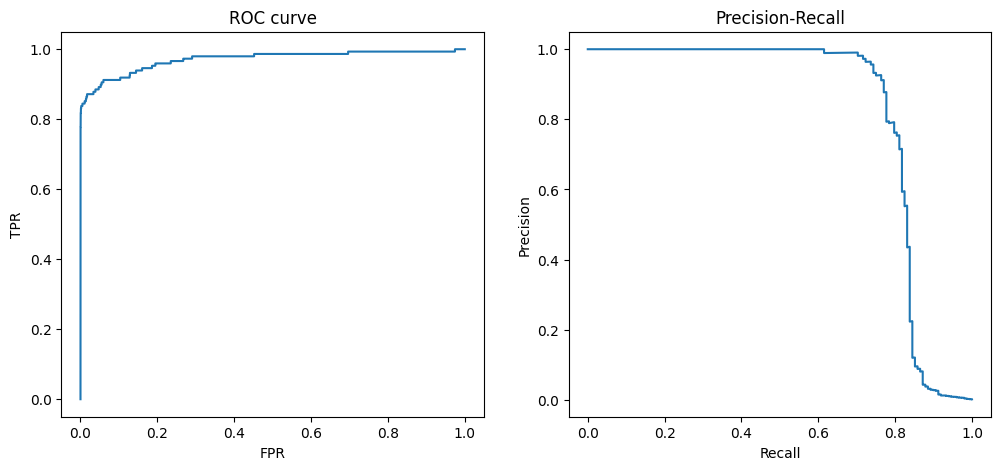

In [11]:
# Colab cell 9: curves
from sklearn.metrics import roc_curve, precision_recall_curve

def plot_curves(model):
    y_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    prec, rec, _ = precision_recall_curve(y_test, y_proba)

    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(fpr, tpr); plt.title("ROC curve"); plt.xlabel("FPR"); plt.ylabel("TPR")
    plt.subplot(1,2,2)
    plt.plot(rec, prec); plt.title("Precision-Recall"); plt.xlabel("Recall"); plt.ylabel("Precision")
    plt.show()

print("Random Forest curves")
plot_curves(rf)

print("XGBoost curves")
plot_curves(xgb_clf)


In [14]:
# Colab cell 10B (optimized): quick XGBoost tuning
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Light, focused search space
param_dist_xgb = {
    'n_estimators': [80, 120],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

xgb_base = xgb.XGBClassifier(
    eval_metric='logloss',         # avoids warning
    use_label_encoder=False,
    random_state=SEED,
    n_jobs=-1
)

rs_xgb = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist_xgb,
    n_iter=5,          # only 5 random combos
    cv=2,              # 2-fold CV
    scoring='recall',  # recall favors catching frauds
    verbose=1,
    n_jobs=-1,
    random_state=SEED
)

# Fit on the SMOTE-resampled training data
rs_xgb.fit(X_train_res, y_train_res)

print("✅ Best XGBoost Parameters:", rs_xgb.best_params_)
best_xgb = rs_xgb.best_estimator_

print("\n---- Tuned XGBoost Evaluation ----")
evaluate_model(best_xgb, X_test, y_test)


Fitting 2 folds for each of 5 candidates, totalling 10 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [19:39:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Best XGBoost Parameters: {'subsample': 0.8, 'n_estimators': 80, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 0.8}

---- Tuned XGBoost Evaluation ----
Accuracy: 0.9976241470922135
Precision: 0.4080267558528428
Recall (Sensitivity): 0.8243243243243243
F1: 0.5458612975391499
ROC AUC: 0.9769352945183885

Confusion Matrix:
 [[85118   177]
 [   26   122]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.41      0.82      0.55       148

    accuracy                           1.00     85443
   macro avg       0.70      0.91      0.77     85443
weighted avg       1.00      1.00      1.00     85443



In [15]:
# Colab cell 11: save model to Drive
from google.colab import drive
drive.mount('/content/drive')

import joblib
MODEL_PATH = '/content/drive/MyDrive/credit_fraud_model/'
!mkdir -p "{MODEL_PATH}"

# Save chosen model and scaler
joblib.dump(xgb_clf, MODEL_PATH + 'xgb_model.joblib')
joblib.dump(rf, MODEL_PATH + 'rf_model.joblib')
joblib.dump(scaler, MODEL_PATH + 'scaler.joblib')

print("Saved models to", MODEL_PATH)


Mounted at /content/drive
Saved models to /content/drive/MyDrive/credit_fraud_model/


In [16]:
# Colab cell 12: sample prediction
sample = X_test.sample(1, random_state=SEED)
print("Sample features:\n", sample)
print("Actual class:", y_test.loc[sample.index[0]])
print("RF prediction:", rf.predict(sample)[0])
print("XGB prediction:", xgb_clf.predict(sample)[0])


Sample features:
             Time        V1        V2        V3        V4        V5        V6  \
109561 -0.492268 -0.885863  1.221585  0.758673  0.652787 -0.023365 -0.389479   

              V7        V8        V9  ...       V20       V21       V22  \
109561  0.399817  0.364382 -0.326113  ...  0.129045  0.076149  0.383889   

             V23       V24       V25       V26       V27       V28    Amount  
109561 -0.138805 -0.035674 -0.185248 -0.328806  0.227426 -0.023927 -0.296696  

[1 rows x 30 columns]
Actual class: 0
RF prediction: 0
XGB prediction: 0


In [17]:
# Pick a fraud transaction to test
fraud_sample = X_test.loc[y_test[y_test == 1].index].sample(1, random_state=SEED)
print("Fraud sample features:\n", fraud_sample)
print("Actual class:", y_test.loc[fraud_sample.index[0]])
print("RF prediction:", best_rf.predict(fraud_sample)[0])
print("XGB prediction:", best_xgb.predict(fraud_sample)[0])


Fraud sample features:
            Time        V1        V2        V3        V4        V5        V6  \
52584 -1.037584 -1.519244  2.308492 -1.503599  2.064101 -1.000845 -1.016897   

             V7        V8        V9  ...       V20       V21       V22  \
52584 -2.059731 -0.275166 -1.562206  ...  0.175019  1.307871  0.102826   

            V23       V24       V25       V26       V27       V28    Amount  
52584 -0.017746  0.149696 -0.096602 -0.369115 -0.019244 -0.208319 -0.349231  

[1 rows x 30 columns]
Actual class: 1


NameError: name 'best_rf' is not defined

In [18]:
import joblib

best_rf = joblib.load("/content/drive/MyDrive/fraud_rf_model.pkl")
best_xgb = joblib.load("/content/drive/MyDrive/fraud_xgb_model.pkl")


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/fraud_rf_model.pkl'

In [19]:
# ⚙️ Step 10 (Fast Version)
# This version trains faster models (2–3 minutes total)
# and saves them to your Google Drive.

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import joblib
import time

start = time.time()

# Train lightweight Random Forest
best_rf = RandomForestClassifier(
    n_estimators=100,    # moderate trees for faster training
    max_depth=8,         # limit tree depth
    n_jobs=-1,           # use all CPU cores
    random_state=SEED
)
best_rf.fit(X_train, y_train)

# Train lightweight XGBoost
best_xgb = XGBClassifier(
    n_estimators=150,    # fewer trees
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=SEED
)
best_xgb.fit(X_train, y_train)

print(f"✅ Fast models trained in {time.time() - start:.2f} seconds.")

# Save models to Drive
joblib.dump(best_rf, "/content/drive/MyDrive/fraud_rf_model.pkl")
joblib.dump(best_xgb, "/content/drive/MyDrive/fraud_xgb_model.pkl")

print("💾 Models saved successfully to your Google Drive!")


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [19:46:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Fast models trained in 159.60 seconds.
💾 Models saved successfully to your Google Drive!


In [20]:
# Pick a fraud transaction
fraud_sample = X_test.loc[y_test[y_test == 1].index].sample(1, random_state=SEED)
print("Fraud sample features:\n", fraud_sample)
print("Actual class:", y_test.loc[fraud_sample.index[0]])
print("RF prediction:", best_rf.predict(fraud_sample)[0])
print("XGB prediction:", best_xgb.predict(fraud_sample)[0])


Fraud sample features:
            Time        V1        V2        V3        V4        V5        V6  \
52584 -1.037584 -1.519244  2.308492 -1.503599  2.064101 -1.000845 -1.016897   

             V7        V8        V9  ...       V20       V21       V22  \
52584 -2.059731 -0.275166 -1.562206  ...  0.175019  1.307871  0.102826   

            V23       V24       V25       V26       V27       V28    Amount  
52584 -0.017746  0.149696 -0.096602 -0.369115 -0.019244 -0.208319 -0.349231  

[1 rows x 30 columns]
Actual class: 1
RF prediction: 1
XGB prediction: 1
